***
# Final Case Study
MSDS 7333 Quantifying the World  
*Allison Roderick, Jenna Ford, and Will Arnost* 
***

## Table of Contents

<a href='#Section_1'> 1. Introduction </a>  
<a href='#Section_2'> 2. Question </a>  
<a href='#Section_3'> 3. Methods </a>  
<a href='#Section_3_a'> &nbsp;&nbsp;&nbsp; a. Dataset </a>  
<a href='#Section_3_b'> &nbsp;&nbsp;&nbsp; b. Dataset Cleanup </a>  
<a href='#Section_3_c'> &nbsp;&nbsp;&nbsp; c. Feature Scaling and One-Hot Encoding </a>  
<a href='#Section_4'> 4. Modeling </a>  
<a href='#Section_4_a'> &nbsp;&nbsp;&nbsp; a. Custom Scoring Metric </a>  
<a href='#Section_4_b'> &nbsp;&nbsp;&nbsp; b. Random Forest </a>  
<a href='#Section_4_c'> &nbsp;&nbsp;&nbsp; c. LightGBM </a>  
<a href='#Section_4_d'> &nbsp;&nbsp;&nbsp; d. Neural Network </a>  
<a href='#Section_5'> 4. Results </a>  
<a href='#Section_6'> 6. Conclusion </a>  
<a href='#Section_7'> 7. Code </a>  

In [40]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

<a id = 'Section_1'></a>

## 1. Introduction

This week's case study involves predicting a target variable. The goal is to minimize the dollar loss associated with false negatives and false positives. A false positive costs \\$25, a false negative costs \\$125, and true positives and negatives cost \\$0. No metadata about the dataset has been provided.

<a id = 'Section_2'></a>

## 2. Question

* 160,000 records x 50 features
* There is no metadata (aka data labels)
* Report on the best model you can build
 * Make it a report
 * Document your code
 * DATA: https://smu.box.com/s/k9x192jxm39enjw2wx8ouw2kopx33l32
* You are to provide the report to me, the business partner.
* Your business partner does not know statistics
* Your business partner DOES know what he wants
* My goal is I want to minimize my dollar losses.  For every false positive, I lose \\$25.  For every False Negative I lose \\$125.
* Positive = Class 1, Negative = Class 0
* Justify your decisions on a statistics/ML level.
* No need to go into minute details
 * Example: “We do a search to optimize for 𝜆 to prevent overfitting” 
 * Take it to a level just before you would need math equations.
* Label and Caption figures


<a id = 'Section_3'></a>

## 3. Methods

This section gives an overview of what we know about the data and how we prepared the dataset for modeling.

<a id = 'Section_3_a'></a>

### 3a. Dataset

The dataset used in this analysis contains 160,000 observations, 50 features, and a target column `y` for classification. No metadata was provided about the dataset, including column names.

<a id = 'Section_3_b'></a>

### 3b. Dataset Cleanup

Three features required some data cleansing:
* x29 - correct the following values:
 * 'Dev' to 'Dec'
 * 'July' to 'Jul'
 * 'sept.' to 'Sep'
* x32 - remove `%`, format as a number, and then divide by 100
* x37 - remove `$`, and then format as a number

Missing values were present in all 50 features. For numeric features, we imputed the median value over the entire feature to fill in missing values. For categorical features, we created another category `Missing`.

Exploratory data analysis identified 2 pairs of features that were highly correlated with one another: x2/x6 and x38/x41. For each pair of features, one of the features equals the other feature times a constant. As such, one feature in each pair can be removed from the dataset because it provides no additional value for modeling purposes. We choose to remove x6 and x41.

<a id = 'Section_3_c'></a>

### 3c. Feature Scaling and One-Hot Encoding

To prepare the dataset for modeling we also scaled the numeric features and one-hot encoded the categorical features. Numeric scaling was performed so that the mean of the feature becomes 0 and the standard deviation becomes 1. One-hot encoding creates new features for each category present in the feature. For example, instead of one feature with 12 different values representing the months of the year, one-hot encoding creates 12 features, each feature representing a different month.

The final step to prepare the dataset for modeling is a train and test split of the data. We split the data into a training dataset with 80% of the observations and a test dataset with 20% of the observations. This allows us to validate our models with data not used to create the models.

<a id = 'Section_4'></a>

## 4. Modeling

In this section, a brief overview is given of the modeling techniques that will be used to classify the target variable in the dataset.

<a id = 'Section_4_a'></a>

### 4a. Custom Scoring Metric

We created a custom scoring metric to use for Random Forest and LightGBM. These models will use attempt to minimize the custom scoring metric. The metric calculates a total dollar loss where a false positive costs \\$25 and a false negative costs \\$125. True positives and negatives do not add to the total dollar loss of the model. The model with the lowest total dollar loss (closer to or above zero) would be the winning model.

<a id = 'Section_4_b'></a>

### 4b. Random Forest

Random forest is an algorithm that creates a forest of decision trees used, in this instance, for classification. The resulting classification is an ensemble of the decision trees created during modeling. We used 5-fold cross validation to train the model. The following parameters were hyper-tuned using a randomized search (bold indicates the winning combination of parameters):

* n_estimators: 100, 200, **500**
* max_features: auto, **sqrt**
* min_samples_split: 5, **10**, 100
* min_samples_leaf: 2, **5**, 10
* max_depth: 5, 10, 20, 30, **40**, 50
* min_impurity_decrease: 0.0, **0.01**
* warm_start: **True**

<a id = 'Section_4_c'></a>

### 4c. LightGBM

LightGBM is a gradient boosting algorithm known for its speed and performance. We used 5-fold cross validation to train the model. The following parameters were hyper-tuned using a randomized search (bold indicates the winning combination of parameters):

* objective: **binary**
* n_estimators: 100, 200, 300, **400**
* learning_rate: 0.001, .005, 0.01, 0.05, **0.1**
* num_leaves: 20, 31, 40, **50**
* tree_learner: **serial**, feature
* min_split_gain: 0.0001, 0.001, **0.005**, 0.01, 0.05, 0.1
* feature_fraction: 0.8, 0.9, **1**
* min_data_in_leaf: 10, 20, 50, **100**
* max_depth: -1, 5, **10**, 15, 20, 25, 30

<a id = 'Section_4_d'></a>

### 4d. Neural Network

We created a neural network with 3 dense layers. The activation function for the first 2 layers was `relu` and for the final layer was `sigmoid`. We choose and early stopping criteria that stops training when the loss on the test dataset does not have a minimum change of 0.00001 over 10 epochs. The optimizer we choose to use was `adam` with a binary cross-entropy loss. The custom scoring metric we developed is applied after the winning model is selected and is not used to optimize the model, like we did with previous models.

<a id = 'Section_5'></a>

## 5. Results

`Table 1` shows the winning model for each algorithm trained on the dataset. The Neural Network model obtained the smallest dollar loss at -$87,900. The accuracy from the Neural Network was also the highest of the 3 models, at 96.13%.

*Table 1. Winning Models from Each Algorithm.*

| Model | Accuracy | Dollar Impact 
| :-- | :-- | :-- 
| Random Forest | 92.35\% | -\$223,625
| LightGBM | 93.67\% | -\$162,575
| **Neural Network** | **96.13\%** | **-\$87,900**


`Table 2` shows how the test observations performed in the Neural Network Model. False positives and false negatives are of concern for this analysis. There were 671 false positives, where the observations were predicted to be 1 or YES, but were not. There were 569 false negatives, where the observations were predicted to be 0 or NO, but were instead 1 or YES.

*Table 2. Confusion Matrix for Neural Network Model.*

| | Predicted NO | Predicted YES | 
| :-- | :-- | :-- |
| Actual NO | TN = 18,509 | FP = 671 |
| Actual YES | FN = 569 | TP = 12,251 |

True positives and true negatives do not have a negative impact and contribute \\$0 to the overall dollar loss for each occurrence. False positives contribute -\\$25 to the overall dollar loss, per occurrence. False negatives create a larger impact to the overall dollar loss at \\$125 per occurrence. `Table 3` summarizes the dollar loss for the test dataset. The total loss for the 32,000 observations in our test dataset is -\\$87,900.

*Table 3. Dollar Impact for Neural Network.*

| | Predicted NO | Predicted YES | 
| :-- | :-- | :-- |
| Actual NO | \$0 |  -\$16,775 
| Actual YES |  -\$71,125 | \$0 

To generalize these numbers, we look at a dollar loss per observation of $2.75:

$$ \$ Loss Per Observation=\frac{Total \$ Loss}{\# Obs}=\frac{\$87,900}{32,000}=\$2.75$$

`Figure 1` shows the accuracy curve for the neural network model. The early stopping criteria prevented the model from training past 30 epochs since the loss on the test dataset was no longer improving enough. Accuracy for the test dataset levels off just above 96% starting at epoch 13.

*Figure 1. Neural Network Accuracy Curve*

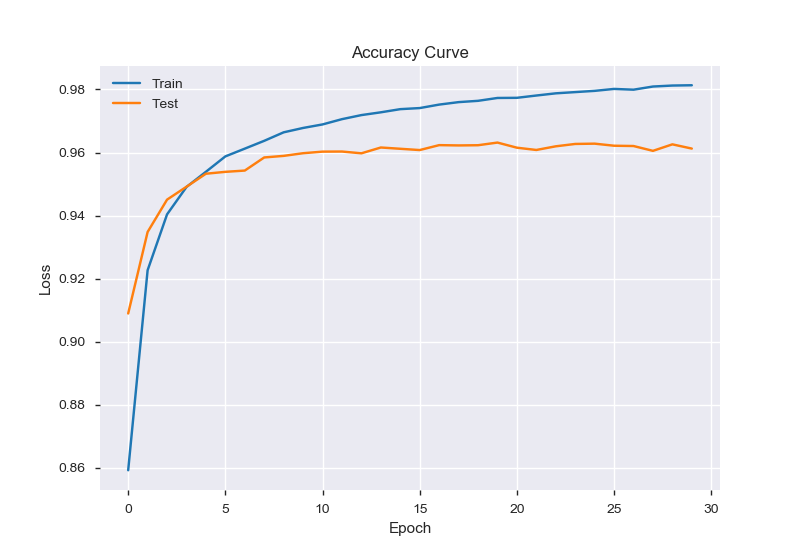

In [45]:
from IPython.display import Image
Image(filename='AccuracyCurve.png') 

`Figure 2` shows the loss curve for the neural network model. Loss on the test dataset levels off starting around epoch 9 and then starts increasing again around epoch 20.

*Figure 2. Neural Network Accuracy Curve*

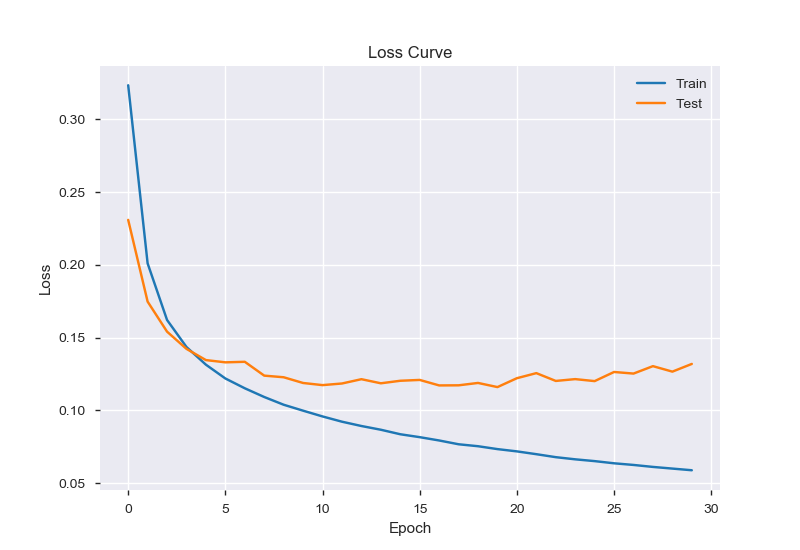

In [43]:
from IPython.display import Image
Image(filename='LossCurve.png') 

<a id = 'Section_6'></a>

## 6. Conclusion

The purpose of this analysis was to minimize dollar losses. We performed imputation on the dataset to handle missing values and corrected other errors in the dataset. The cleaned-up dataset was split into training and test with a 80%/20% split to enable us to evaluate model performance. Random Forest, LightGBM and Neural Network models were trained to identify the model that would minimize the dollar loss.

A neural network with 3 dense layers produced the best model, of the 3 tested here. The average dollar loss per observation in the test dataset was \\$2.75; on average with this model we would expect a loss of \\$2.75 for every observation.

<a id = 'Section_7'></a>

## 7. Code

### Load Packages

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling

### Read in the Data

In [2]:
df = pd.read_csv("../../../final_project.csv")

In [5]:
# there are missing values
df.isnull().values.any()

True

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0     159974 non-null float64
x1     159975 non-null float64
x2     159962 non-null float64
x3     159963 non-null float64
x4     159974 non-null float64
x5     159963 non-null float64
x6     159974 non-null float64
x7     159973 non-null float64
x8     159979 non-null float64
x9     159970 non-null float64
x10    159957 non-null float64
x11    159970 non-null float64
x12    159964 non-null float64
x13    159969 non-null float64
x14    159966 non-null float64
x15    159965 non-null float64
x16    159974 non-null float64
x17    159973 non-null float64
x18    159960 non-null float64
x19    159965 non-null float64
x20    159962 non-null float64
x21    159971 non-null float64
x22    159973 non-null float64
x23    159953 non-null float64
x24    159972 non-null object
x25    159978 non-null float64
x26    159964 non-null float64
x27    159970 non-null float64
x28    159965 non-null

In [7]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


In [9]:
pandas_profiling.ProfileReport(df)

C:\Users\b007224\AppData\Local\Continuum\anaconda3\envs\ML7331\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,51
Number of observations,160000
Total Missing (%),0.0%
Total size in memory,62.3 MiB
Average record size in memory,408.0 B
Numeric,43
Categorical,5
Boolean,1
Date,0
Text (Unique),0
Rejected,2


### Data Cleanup

In [3]:
# Fixing Numeric columns that imported as string
df['x32'] = df['x32'].replace('[\%,]', '', regex=True).astype(float)/100
df['x37'] = df['x37'].replace('[\$,]', '', regex=True).astype(float)
df['x29'] = df['x29'].replace('Dev', 'Dec', regex=True)
df['x29'] = df['x29'].replace('July', 'Jul', regex=True)
df['x29'] = df['x29'].replace('January', 'Jan', regex=True)
df['x29'] = df['x29'].replace('sept.', 'Sep', regex=True)

In [11]:
pd.set_option("display.max_rows", 500, "display.max_columns", None)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,euorpe,-0.801340,1.142950,1.005131,-18.473784,Jul,tuesday,-3.851669,0.0000,-1.940031,-5.492063,0.627121,-0.873824,1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,asia,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.0002,2.211462,-4.460591,1.035461,0.228270,1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,asia,-0.718315,-0.566757,4.171088,11.522448,Jul,wednesday,-3.262082,-0.0001,0.419607,-3.804056,-0.763357,-1.612561,430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,asia,-0.052430,-0.558582,9.215569,30.595226,Jul,wednesday,-2.285241,0.0001,-3.442715,4.420160,1.164532,3.033455,-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,asia,-0.223449,0.350781,1.811182,-4.094084,Jul,tuesday,0.921047,0.0001,-0.431640,12.165494,-0.167726,-0.341604,-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0     159974 non-null float64
x1     159975 non-null float64
x2     159962 non-null float64
x3     159963 non-null float64
x4     159974 non-null float64
x5     159963 non-null float64
x6     159974 non-null float64
x7     159973 non-null float64
x8     159979 non-null float64
x9     159970 non-null float64
x10    159957 non-null float64
x11    159970 non-null float64
x12    159964 non-null float64
x13    159969 non-null float64
x14    159966 non-null float64
x15    159965 non-null float64
x16    159974 non-null float64
x17    159973 non-null float64
x18    159960 non-null float64
x19    159965 non-null float64
x20    159962 non-null float64
x21    159971 non-null float64
x22    159973 non-null float64
x23    159953 non-null float64
x24    159972 non-null object
x25    159978 non-null float64
x26    159964 non-null float64
x27    159970 non-null float64
x28    159965 non-null

### Impute Missing Values

In [4]:
# Impute missing numeric
numb = df.select_dtypes(include='number').columns
df[numb] = df[numb].fillna(df[numb].median().to_dict())

In [5]:
# show columns with missing values still (only the categorical columns left)
for i in df.columns:
    if df.loc[df[i].isna(),i].shape[0]>0:
        print(i, df.loc[df[i].isna(),i].shape)

x24 (28,)
x29 (30,)
x30 (30,)


In [6]:
# fill missing categorical columns with the word 'Missing'
cats = df.select_dtypes(include='object').columns

df[cats] = df[cats].transform(lambda x: x.fillna('Missing'))

In [7]:
# show columns with missing values still (none)
for i in df.columns:
    if df.loc[df[i].isna(),i].shape[0]>0:
        print(i, df.loc[df[i].isna(),i].shape)

### Create Model Datasets

In [8]:
# drop x6 and x41
# x6 = x2 * 1.453925
# x41 = x38 * 1.105921
X = df.copy().drop(columns=["y"])
print("The shape of X is: ", X.shape)

y = df.loc[:,"y"].copy()
print("The shape of y is: ", y.shape)

The shape of X is:  (160000, 50)
The shape of y is:  (160000,)


### Normalize and One-Hot Encode the data

In [9]:
from sklearn.preprocessing import StandardScaler
def transform_data(data):
    #OH encode
    label_encode = data.select_dtypes(include='object').columns
    normalize = data.select_dtypes(include='number').columns

    data_OHE = pd.get_dummies(data, columns=label_encode)
    
    #Standardize the variables
    scaler = StandardScaler()
    data_OHE[normalize] = scaler.fit_transform(data_OHE[normalize])
 
    return data_OHE

In [10]:
X2 = transform_data(X)
display(X2)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29_Missing,x29_Nov,x29_Oct,x29_Sep,x30_Missing,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
0,-0.446058,-0.625059,0.434853,0.310829,-0.281989,0.103154,0.434754,-0.232398,-0.113491,-0.662595,...,0,0,0,0,0,0,0,0,1,0
1,-0.401142,-0.092590,2.184324,0.517973,1.007145,-0.318226,2.184158,0.031663,0.104146,0.051099,...,0,0,0,0,0,0,0,0,0,1
2,-0.864117,-0.225734,1.009787,0.819873,-0.831135,-1.476650,1.009666,0.614063,0.601806,-0.415214,...,0,0,0,0,0,0,0,0,0,1
3,-0.659021,0.800509,-1.732948,0.454106,1.019525,0.296857,-1.732962,-0.367422,-0.034436,-0.877112,...,0,0,0,0,0,0,0,0,0,1
4,-0.733857,0.048101,-0.768724,0.210985,0.458963,-0.082200,-0.768776,1.153419,0.138222,-0.678986,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,-1.309589,-0.673746,0.118113,-0.244019,0.275489,-0.154046,0.118027,1.597177,-0.212644,-0.374491,...,0,0,0,0,0,0,0,0,0,1
159996,2.227142,0.757558,1.756477,1.413174,0.268962,0.909770,1.756328,-0.150145,-0.430371,1.055904,...,0,0,0,0,0,0,0,0,0,1
159997,-2.159656,0.845621,0.632436,-0.926509,0.359744,-0.361141,0.632330,1.644046,0.163082,1.067517,...,0,0,0,0,0,0,0,0,0,1
159998,0.916897,1.200062,0.491160,-0.347323,0.634097,1.996178,0.491059,-0.083183,0.296669,0.668143,...,0,0,0,0,0,0,0,0,0,1


In [20]:
X2.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x24_Missing,x24_america,x24_asia,x24_euorpe,x29_Apr,x29_Aug,x29_Dec,x29_Feb,x29_Jan,x29_Jul,x29_Jun,x29_Mar,x29_May,x29_Missing,x29_Nov,x29_Oct,x29_Sep,x30_Missing,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
count,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,1.600000e+05,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,4.495571e-17,8.381663e-18,-5.851916e-17,-2.656070e-17,-2.693817e-17,-5.459522e-18,2.265896e-17,-3.236716e-17,7.825962e-17,-2.466430e-17,-1.607672e-17,3.346351e-17,-4.880558e-18,2.208997e-17,1.103978e-17,5.279110e-17,4.025617e-17,6.113721e-17,-1.044789e-17,2.395618e-17,3.190642e-17,2.144812e-17,4.129856e-17,2.280537e-17,-3.947676e-17,-1.163271e-17,-1.804390e-17,-3.407136e-17,2.714634e-17,-6.913511e-16,2.200323e-17,-1.725980e-17,6.247780e-18,-3.821041e-17,2.422229e-17,1.218040e-16,1.371091e-17,-1.804668e-17,-4.498901e-17,-4.980044e-18,-3.429271e-17,-4.653257e-17,2.181588e-18,1.038891e-17,4.346523e-17,1.336292e-17,-2.825240e-17,0.000175,0.027931,0.868531,0.103362,0.042256,0.183787,0.000144,0.000875,0.000056,0.284806,0.258306,0.007694,0.137119,0.000188,0.002106,0.015044,0.067619,0.000188,0.003525,0.003050,0.183931,0.174712,0.634594
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.013228,0.164776,0.337913,0.304433,0.201174,0.387312,0.011989,0.029568,0.007500,0.451324,0.437705,0.087376,0.343974,0.013692,0.045846,0.121727,0.251091,0.013692,0.059267,0.055143,0.387429,0.379722,0.481545
min,-4.288823e+00,-4.144980e+00,-4.388522e+00,-4.396283e+00,-4.460683e+00,-4.412028e+00,-4.388434e+00,-5.691441e+00,-4.231245e+00,-4.404195e+00,-4.613370e+00,-4.347593e+00,-4.262139e+00,-4.326084e+00,-4.439441e+00,-5.197628e+00,-5.226939e+00,-4.546090e+00,-4.451716e+00,-4.695258e+00,-4.646718e+00,-4.620455e+00,-4.370773e+00,-4.518880e+00,-5.036419e+00,-4.573763e+00,-4.724281e+00,-5.051167e+00,-4.438996e+00,-4.807344e+00,-4.260227e+00,-4.507126e+00,-4.206687e+00,-4.314053e+00,-4.735530e+00,-4.757674e+00,-4.305838e+00,-4.209855e+00,-4.757965e+00,-5.107341e+00,-4.478939e+00,-4.317236e+00,-4.423039e+00,-5.165182e+00,-4.410353e+00,-4.386876e+00,-4.330973e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.751325e-01,-6.721857e-01,-6.791459e-01,-6.730523e-01,-6.755947e-01,-6.729232e-01,-6.792013e-01,-6.426318e-01,-6.740

### EDA

In [12]:
cols_corr = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x32', 'x33',
       'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43',
       'x44', 'x45', 'x46', 'x47', 'x48', 'x49']

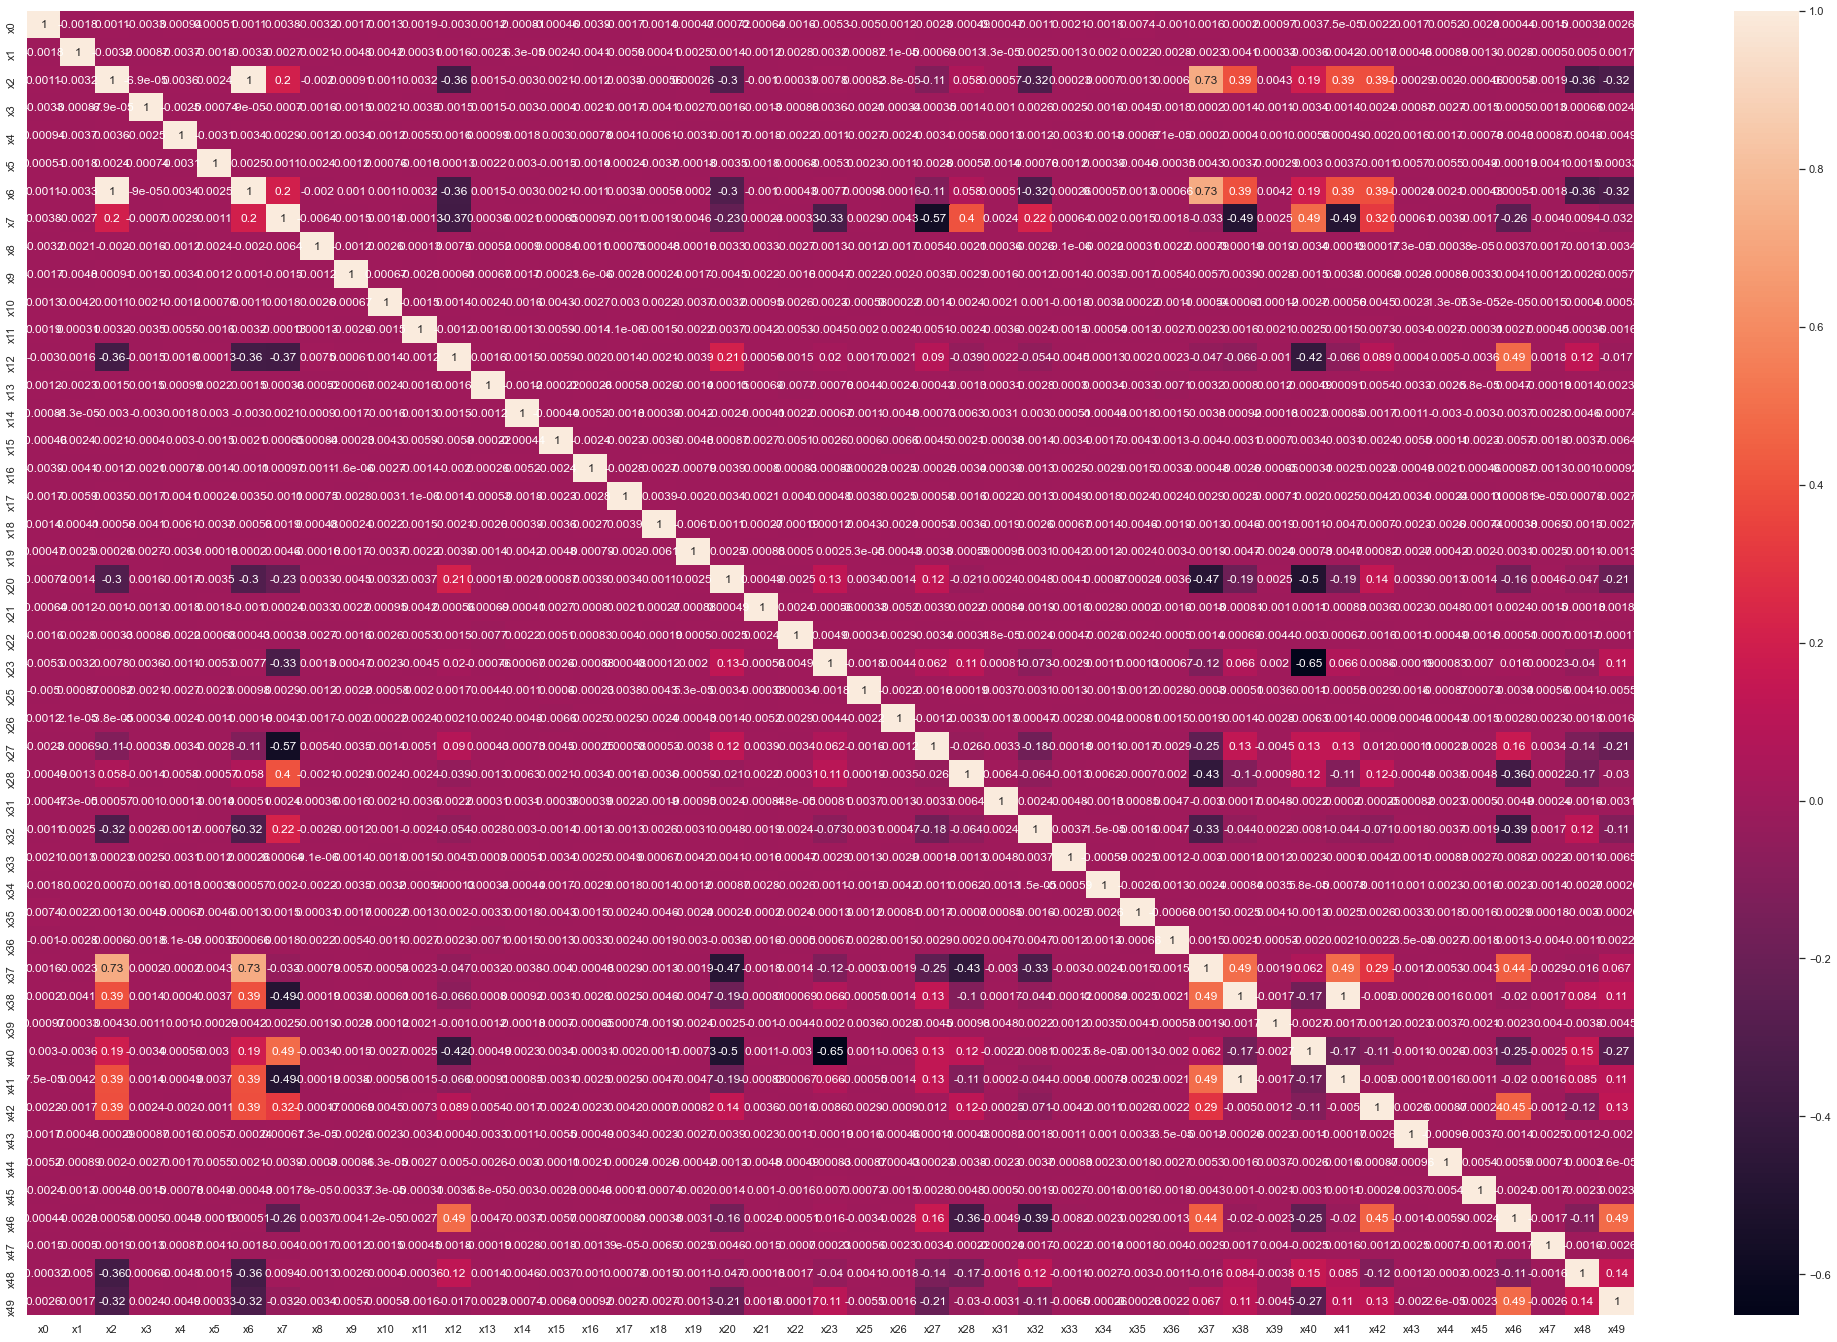

In [19]:
import seaborn as sns
sns.set(rc={'figure.figsize':(36,24)})
sns.heatmap(X2[cols_corr].corr(), annot = True)

In [29]:
# X2, X6
# X38, x41
check = df[['x2','x6']].copy()
check['check'] = (check.x6-check.x2) / check.x2
check.head(20)

,x2,x6,check
0,4.621113,6.718751,0.453925
1,27.839856,40.477058,0.453925
2,12.251561,17.812850,0.453925
3,-24.149632,-35.111751,0.453925
4,-11.352593,-16.505817,0.453925
5,10.831367,15.747993,0.453925
6,-7.412661,-10.777451,0.453925
7,-6.731169,-9.786614,0.453925
8,0.774836,1.126553,0.453925
9,-3.355872,-4.879186,0.453925


In [30]:
check = df[['x38','x41']].copy()
check['check'] = (check.x41-check.x38) / check.x38
check.head(20)

,x38,x41,check
0,-1.353729,-1.497117,0.105921
1,32.816804,36.292790,0.105921
2,-0.333199,-0.368491,0.105921
3,14.188669,15.691546,0.105921
4,-12.578926,-13.911297,0.105921
5,-6.555903,-7.250310,0.105921
6,-14.102935,-15.596731,0.105921
7,17.885994,19.780494,0.105921
8,-23.704439,-26.215235,0.105921
9,17.421890,19.267232,0.105921


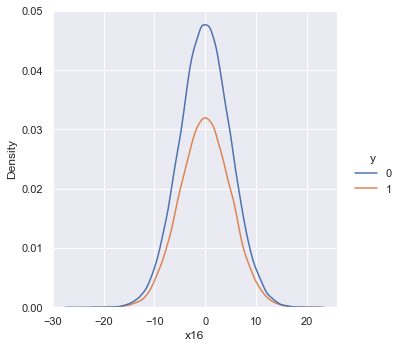

In [22]:
sns.displot(df, x="x16", hue="y", kind="kde")



In [32]:
df.y.value_counts()

0    95803
1    64197
Name: y, dtype: int64

### Create the Train/Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2.drop(columns=['x6','x41']),y,test_size=.2, random_state=42)

### Custom Scorer

In [13]:
from sklearn.metrics import confusion_matrix, make_scorer,accuracy_score
def myscore(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tn_score = tn * 0
    tp_score = tp * 0
    fp_score = fp * -25
    fn_score = fn * -125
    score = tn_score + tp_score + fp_score + fn_score
    return score

willScore = make_scorer(myscore)

### LightGBM

In [45]:
%%time
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

model = LGBMClassifier()
param_grid = {
    'objective':['binary'],
    'n_estimators': [100,200,300,400],
    'learning_rate':[.001,.005,0.01,0.05,0.1],
    'num_leaves': [20,31,40,50],
    'tree_learner':['serial','feature'],
    'min_split_gain': [.0001,.001,.005,0.01,0.05,0.1],
    'feature_fraction': [0.8,0.9,1],
    'min_data_in_leaf': [10,20,50,100],
    'max_depth':[-1,5,10,15,20,25,30],
    'seed': [123]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
n_iter_search = 1000

lgbm = RandomizedSearchCV(estimator=LGBMClassifier(),param_distributions=param_grid,cv=cv,n_jobs=-1,verbose=2,
                          random_state=42,n_iter=n_iter_search,scoring=willScore)
lgbm_fit = lgbm.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 47.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 73.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 105.8min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 142.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 185.5min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 235.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 289.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 344.8min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 352.2min finished


Wall time: 5h 52min 21s


In [46]:
lgbm_cv_results = pd.DataFrame(lgbm.cv_results_).sort_values('rank_test_score')
lgbm_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tree_learner,param_seed,param_objective,param_num_leaves,param_n_estimators,param_min_split_gain,param_min_data_in_leaf,param_max_depth,param_learning_rate,param_feature_fraction,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
548,48.129711,0.513015,2.294066,0.169050,serial,123,binary,50,400,0.005,100,10,0.1,1,"{'tree_learner': 'serial', 'seed': 123, 'objec...",-134100.0,-146425.0,-143975.0,-135375.0,-131625.0,-138300.0,5813.303708,1
313,49.798847,1.125001,2.105570,0.128140,serial,123,binary,50,400,0.1,50,15,0.1,1,"{'tree_learner': 'serial', 'seed': 123, 'objec...",-137375.0,-147875.0,-141500.0,-135900.0,-139500.0,-140430.0,4178.319040,2
474,44.770095,0.369947,2.158229,0.191948,feature,123,binary,50,400,0.05,100,25,0.1,0.9,"{'tree_learner': 'feature', 'seed': 123, 'obje...",-136450.0,-145950.0,-142375.0,-144800.0,-134850.0,-140885.0,4456.276473,3
211,46.386770,0.554744,2.237818,0.057342,serial,123,binary,50,400,0.1,50,20,0.1,0.9,"{'tree_learner': 'serial', 'seed': 123, 'objec...",-136725.0,-145575.0,-148050.0,-137875.0,-137375.0,-141120.0,4727.430592,4
448,51.568122,2.827896,2.028576,0.101703,feature,123,binary,50,400,0.001,50,15,0.1,1,"{'tree_learner': 'feature', 'seed': 123, 'obje...",-138775.0,-143025.0,-144275.0,-143325.0,-138250.0,-141530.0,2503.617383,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,11.324121,0.209694,0.580647,0.041562,feature,123,binary,20,100,0.001,10,5,0.001,0.9,"{'tree_learner': 'feature', 'seed': 123, 'obje...",-1284375.0,-1284375.0,-1284375.0,-1284500.0,-1284500.0,-1284425.0,61.237244,888
263,12.804363,0.436738,0.646073,0.034418,serial,123,binary,20,100,0.05,10,-1,0.001,0.8,"{'tree_learner': 'serial', 'seed': 123, 'objec...",-1284375.0,-1284375.0,-1284375.0,-1284500.0,-1284500.0,-1284425.0,61.237244,888
908,17.202204,0.381414,0.638494,0.093118,serial,123,binary,31,100,0.01,50,25,0.001,1,"{'tree_learner': 'serial', 'seed': 123, 'objec...",-1284375.0,-1284375.0,-1284375.0,-1284500.0,-1284500.0,-1284425.0,61.237244,888
920,12.507956,0.126888,0.640687,0.040111,feature,123,binary,50,100,0.1,10,5,0.001,0.9,"{'tree_learner': 'feature', 'seed': 123, 'obje...",-1284375.0,-1284375.0,-1284375.0,-1284500.0,-1284500.0,-1284425.0,61.237244,888


In [47]:
# Display the parameters and evaluation metrics (accuracy and log loss) of the best model in terms of highest test accuracy
tempdf = lgbm_cv_results[['param_n_estimators', 'param_learning_rate', 'param_num_leaves', 'param_tree_learner',
                          'param_min_split_gain','param_feature_fraction','param_min_data_in_leaf','param_max_depth',
                          'mean_test_score']]

tempdf1= pd.DataFrame(tempdf.iloc[0, :])
tempdf1

,548
param_n_estimators,400
param_learning_rate,0.1
param_num_leaves,50
param_tree_learner,serial
param_min_split_gain,0.005
param_feature_fraction,1
param_min_data_in_leaf,100
param_max_depth,10
mean_test_score,-138300


In [48]:
# Predict on hold-out test set
lgbm_model = lgbm.best_estimator_

pred = lgbm_model.predict(X_test)
pred_prob = lgbm_model.predict_proba(X_test)

from sklearn import metrics

print('Model Performance')
print("Dollar Loss: ", willScore(lgbm_model, X_test,y_test))
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print(confusion_matrix(y_test,pred))

Model Performance
Dollar Loss:  -162575
Accuracy: 0.93665625
[[18272   908]
 [ 1119 11701]]


### Random Forest

In [15]:
from sklearn.metrics import confusion_matrix, make_scorer,accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

clf = RandomForestClassifier(random_state=42, n_jobs=-1)
# Create stratified 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Tune the following parameters
n_estimators= [100,200,500]
max_features = ['auto', 'sqrt']
min_samples_split = [5, 10, 100]
min_samples_leaf = [2,5,10]
max_depth = [5, 10, 20,30,40,50]
min_impurity_decrease = [0.0, 0.01]
warm_start = ['True']

param_dist = {'n_estimators': n_estimators,
              'max_features': max_features,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'min_impurity_decrease': min_impurity_decrease,
              'max_depth':max_depth,
              'warm_start':warm_start
#               'verbose' : [1]
             }

In [16]:
%%time
n_iter_search = 50
rf_random_search = RandomizedSearchCV(clf, param_distributions=param_dist, scoring=willScore, cv = cv, random_state=42,
                                      n_iter=n_iter_search)
rf_random_search.fit(X_train, y_train)

Wall time: 42min 28s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [5, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_impurity_decrease': [0.0, 0.01],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [5, 10, 100],
                                        'n_estimators': [100, 200, 500],
                                        'warm_start': ['True']},
                   random_state=42, scoring=make_scorer(myscore))

In [17]:
rf_cv_results_df = pd.DataFrame(rf_random_search.cv_results_)
#
rf_cv_results_df.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_min_impurity_decrease,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
49,45.603775,2.319316,0.519450,0.047793,True,500,10,2,0,auto,40,"{'warm_start': 'True', 'n_estimators': 500, 'm...",-188675.0,-192700.0,-197325.0,-191400.0,-185850.0,-191190.0,3867.899947,1
17,14.109836,0.084953,0.148241,0.002759,True,200,10,2,0,sqrt,50,"{'warm_start': 'True', 'n_estimators': 200, 'm...",-187425.0,-194000.0,-199775.0,-192925.0,-189250.0,-192675.0,4278.346643,2
10,32.954026,0.199728,0.309090,0.002494,True,500,5,5,0,sqrt,50,"{'warm_start': 'True', 'n_estimators': 500, 'm...",-194550.0,-200275.0,-206325.0,-195400.0,-192975.0,-197905.0,4865.167006,3
47,15.917372,0.167280,0.178241,0.017986,True,200,5,2,0,sqrt,20,"{'warm_start': 'True', 'n_estimators': 200, 'm...",-192250.0,-199575.0,-207200.0,-201950.0,-196550.0,-199505.0,5031.162887,4
1,15.262093,0.413287,0.151670,0.006985,True,200,10,2,0,auto,20,"{'warm_start': 'True', 'n_estimators': 200, 'm...",-197175.0,-201650.0,-208550.0,-203100.0,-196575.0,-201410.0,4363.616619,5
11,32.166937,0.140998,0.301667,0.005747,True,500,5,5,0,sqrt,20,"{'warm_start': 'True', 'n_estimators': 500, 'm...",-201525.0,-204825.0,-215075.0,-202600.0,-201900.0,-205185.0,5075.642816,6
46,15.089937,0.108060,0.152439,0.004261,True,200,10,10,0,sqrt,50,"{'warm_start': 'True', 'n_estimators': 200, 'm...",-208425.0,-211500.0,-215950.0,-209600.0,-205775.0,-210250.0,3400.918993,7
25,12.970052,0.116815,0.131699,0.000562,True,200,10,10,0,auto,30,"{'warm_start': 'True', 'n_estimators': 200, 'm...",-208725.0,-211625.0,-217825.0,-210125.0,-207300.0,-211120.0,3647.752733,8
28,6.842156,0.055251,0.083417,0.000492,True,100,10,10,0,sqrt,40,"{'warm_start': 'True', 'n_estimators': 100, 'm...",-210475.0,-214525.0,-219575.0,-214875.0,-211800.0,-214250.0,3132.890040,9
48,15.709203,0.866193,0.181925,0.030853,True,200,10,10,0,sqrt,20,"{'warm_start': 'True', 'n_estimators': 200, 'm...",-211550.0,-216450.0,-224075.0,-215825.0,-207775.0,-215135.0,5461.698454,10


In [18]:
# Display the parameters and evaluation metric of the best model in terms of highest test accuracy
tempdf = rf_cv_results_df[['param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf',
                      'param_min_impurity_decrease', 'param_max_features', 'mean_test_score']]

tempdf1= pd.DataFrame(tempdf.iloc[0, :])
tempdf1

,0
param_n_estimators,500
param_min_samples_split,10
param_min_samples_leaf,5
param_min_impurity_decrease,0.01
param_max_features,sqrt
mean_test_score,-1.28442e+06


In [19]:
# Predict on hold-out test set
rf_model = rf_random_search.best_estimator_

pred = rf_model.predict(X_test)

from sklearn import metrics
print("Dollar Loss: ", willScore(rf_model, X_test,y_test))
print("Accuracy: ",accuracy_score(y_test,pred))
#print('Model Performance')
#print("Mean Squared Error:",willScore(y_test, pred))

Dollar Loss:  -223150
Accuracy:  0.9238125


In [20]:
confusion_matrix(y_test,pred)

array([[18364,   816],
       [ 1622, 11198]], dtype=int64)

[Text(0.5, 1.0, 'Feature Importance: RF')]

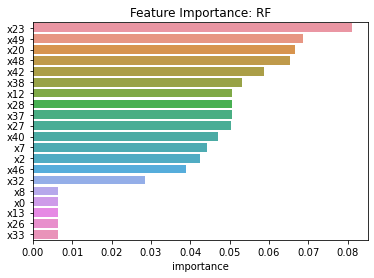

In [21]:
import seaborn as sns
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

sns.barplot(x="importance", y=feature_importances.index.values[0:20], data=feature_importances.iloc[0:20,:]).set(title='Feature Importance: RF')

### Neural Network

In [23]:
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

X_train.shape

(128000, 68)

In [24]:
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.regularizers import l2
from tensorflow.keras import initializers

model = tf.keras.Sequential()
# input
model.add(tf.keras.Input(shape=(68,)))
# hidden
model.add(layers.Dense(100, activation='relu')) 
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

#set early stopping criteria
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.00001 , patience=10)

In [25]:
from tensorflow.keras import optimizers
tf.random.set_seed(123456)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=500, validation_data=(X_test,y_test), batch_size=100, callbacks=[es_callback])

Train on 128000 samples, validate on 32000 samples
Epoch 1/500
128000/128000 [==============================] - 7s 54us/sample - loss: 0.3233 - accuracy: 0.8593 - val_loss: 0.2309 - val_accuracy: 0.9090
Epoch 2/500
128000/128000 [==============================] - 6s 43us/sample - loss: 0.2010 - accuracy: 0.9227 - val_loss: 0.1747 - val_accuracy: 0.9348
Epoch 3/500
128000/128000 [==============================] - 5s 43us/sample - loss: 0.1621 - accuracy: 0.9404 - val_loss: 0.1541 - val_accuracy: 0.9451
Epoch 4/500
128000/128000 [==============================] - 6s 43us/sample - loss: 0.1436 - accuracy: 0.9491 - val_loss: 0.1423 - val_accuracy: 0.9492
Epoch 5/500
128000/128000 [==============================] - 6s 44us/sample - loss: 0.1314 - accuracy: 0.9539 - val_loss: 0.1346 - val_accuracy: 0.9533
Epoch 6/500
128000/128000 [==============================] - 6s 44us/sample - loss: 0.1220 - accuracy: 0.9588 - val_loss: 0.1330 - val_accuracy: 0.9539
Epoch 7/500
128000/128000 [==========

In [38]:
preds = model.predict(X_test, batch_size=100)
type(preds)
preds = [1 if p >= 0.5 else 0 for p in preds]
confusion_matrix(y_test, preds)

array([[18509,   671],
       [  569, 12251]], dtype=int64)

In [39]:
print("Accuracy: ",accuracy_score(y_test,preds))

Accuracy:  0.96125


In [28]:
def willscore(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tn_score = tn * 0
    tp_score = tp * 0
    fp_score = fp * -25
    fn_score = fn * -125
    score = tn_score + tp_score + fp_score + fn_score
    return score

willscore(y_test, preds)

-87900

In [48]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
(tn, fp, fn, tp)

(18509, 671, 569, 12251)

In [33]:
import matplotlib.pyplot as plt
plt.clf()
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.legend(title='')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('LossCurve.png')

In [44]:
import matplotlib.pyplot as plt
plt.clf()
train_loss = model.history.history['accuracy']
val_loss = model.history.history['val_accuracy']
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.legend(title='')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('AccuracyCurve.png')